# Repository Setup

This code:

- Clones the official Janus repository from DeepSeek AI's GitHub
- Changes directory into the downloaded Janus folder
- Installs the package in development mode with pip

Janus is DeepSeek's framework for multimodal AI models that can process both text and images.

In [1]:
!git clone https://github.com/deepseek-ai/Janus
%cd Janus
!pip install -e .

Cloning into 'Janus'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 121 (delta 57), reused 41 (delta 41), pack-reused 38 (from 1)
Receiving objects: 100% (121/121), 7.18 MiB | 28.96 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/Janus
Obtaining file:///content/Janus
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━

### Importing libraries

In [2]:
import torch
from transformers import AutoModelForCausalLM
from janus.models import MultiModalityCausalLM, VLChatProcessor
from janus.utils.io import load_pil_images

Python version is above 3.10, patching the collections module.


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:602: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


# Multimodal Model Setup

This code:

- Specifies Janus-Pro-7B as the target model
- Loads the visual-language chat processor for handling multimodal inputs
- Extracts the tokenizer component for text processing
- Initializes the multimodal language model with remote code execution enabled
- Optimizes the model by converting to bfloat16 precision, moving to GPU, and setting to evaluation mode

In [3]:
# define model location
model_location = "deepseek-ai/Janus-Pro-7B"
multimodal_processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_location)
text_processor = multimodal_processor.tokenizer
visual_language_model: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(
    model_location, trust_remote_code=True
)
visual_language_model = visual_language_model.to(torch.bfloat16).cuda().eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.72M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/344 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


processor_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: sft_format, ignore_id, image_tag, num_image_tokens, add_special_token, mask_prompt. 


config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/89.0k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.85G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/92.8k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

# Conversation Setup

This code:

- Creates a dialogue structure with user and assistant roles
- Includes an image of a tiger with questions about its characteristics
- Loads and processes the image for model compatibility
- Prepares the formatted conversation inputs and transfers them to the GPU

In [4]:
dialogue = [
    {
        "role": "<|User|>",
        "content": f"<image_placeholder>\n What animal is this? Tell me about its habitat and diet. Can you also explain its behavioral characteristics?",
        "images": ['/content/animal.jpg'],
    },
    {"role": "<|Assistant|>", "content": ""},
]

# prepare images and format inputs for model
images = load_pil_images(dialogue)
model_inputs = multimodal_processor(
    conversations=dialogue, images=images, force_batchify=True
).to(visual_language_model.device)

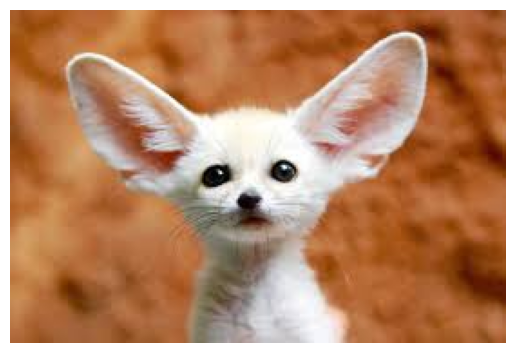

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Loading the image
image = Image.open('/content/animal.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

# Response Generation

This code:

- Converts the processed inputs into embedded representations including image features
- Runs text generation with specific parameters (512 token limit, deterministic output)
- Decodes the resulting token sequence back into human-readable text
- Prints the complete conversation with the model's response

In [6]:
# process image through model's vision encoder
embedded_inputs = visual_language_model.prepare_inputs_embeds(**model_inputs)

# generate text response based on image understanding
response = visual_language_model.language_model.generate(
    inputs_embeds=embedded_inputs,
    attention_mask=model_inputs.attention_mask,
    pad_token_id=text_processor.eos_token_id,
    bos_token_id=text_processor.bos_token_id,
    eos_token_id=text_processor.eos_token_id,
    max_new_tokens=512,
    do_sample=False,
    use_cache=True,
)

result = text_processor.decode(response[0].cpu().tolist(), skip_special_tokens=True)
print(f"{model_inputs['sft_format'][0]}", result)

You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.

<|User|>: <image_placeholder>
 What animal is this? Tell me about its habitat and diet. Can you also explain its behavioral characteristics?

<|Assistant|>: This is a fennec fox, known for its large ears, which help it to hear prey in the desert. Fennec foxes are native to the Sahara Desert in North Africa. They primarily live in rocky, sandy, and gravelly areas. Their diet consists mainly of small mammals, such as gerbils and hares, but they also eat insects, reptiles, and plants. Fennec foxes are nocturnal and solitary animals, with males and females only coming together during the breeding season. They are excellent climbers and have a unique way of moving by using their large ears to balance while walking on narrow ledges.
